In [5]:
from sklearn.linear_model import LinearRegression

from sklearn.metrics import accuracy_score, precision_score, recall_score, auc, roc_curve
from sklearn.preprocessing import PolynomialFeatures, Imputer, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold


In [6]:
import pandas as pd

In [21]:
df = pd.read_csv('../src/Train.zip')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (13,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [88]:
df.shape

(401125, 53)

In [8]:
df.isnull().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    258360
UsageBand                   331486
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             137191
fiModelSeries               344217
fiModelDescriptor           329206
ProductSize                 210775
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                296764
Enclosure                      325
Forks                       209048
Pad_Type                    321991
Ride_Control                252519
Stick                       321991
Transmission                217895
Turbocharged                321991
Blade_Extension     

In [7]:
df.head(3).T

,0,1,2
SalesID,1139246,1139248,1139249
SalePrice,66000,57000,10000
MachineID,999089,117657,434808
ModelID,3157,77,7009
datasource,121,121,121
auctioneerID,3,3,3
YearMade,2004,1996,2001
MachineHoursCurrentMeter,68,4640,2838
UsageBand,Low,Low,High
saledate,11/16/2006 0:00,3/26/2004 0:00,2/26/2004 0:00


In [4]:
df.describe()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter
count,4.011250e+05,401125.000000,4.011250e+05,401125.000000,401125.000000,380989.000000,401125.000000,1.427650e+05
mean,1.919713e+06,31099.712848,1.217903e+06,6889.702980,134.665810,6.556040,1899.156901,3.457955e+03
std,9.090215e+05,23036.898502,4.409920e+05,6221.777842,8.962237,16.976779,291.797469,2.759026e+04
min,1.139246e+06,4750.000000,0.000000e+00,28.000000,121.000000,0.000000,1000.000000,0.000000e+00
25%,1.418371e+06,14500.000000,1.088697e+06,3259.000000,132.000000,1.000000,1985.000000,0.000000e+00
50%,1.639422e+06,24000.000000,1.279490e+06,4604.000000,132.000000,2.000000,1995.000000,0.000000e+00
75%,2.242707e+06,40000.000000,1.468067e+06,8724.000000,136.000000,4.000000,2000.000000,3.025000e+03
max,6.333342e+06,142000.000000,2.486330e+06,37198.000000,172.000000,99.000000,2013.000000,2.483300e+06


In [23]:
median_year = df['YearMade'].median()

In [24]:
df.loc[df[df['YearMade'] == 1000]['YearMade'].index,'YearMade'] = median_year

In [25]:
df['YearMade'].unique()

array([2004., 1996., 2001., 2007., 1993., 2008., 1995., 1998., 1999.,
       2003., 1991., 2000., 2005., 2006., 2002., 1984., 1988., 1980.,
       1992., 1987., 1997., 1971., 1978., 1989., 1985., 1979., 1976.,
       1994., 1982., 1990., 1974., 1968., 1966., 1983., 1986., 1981.,
       1970., 1977., 1975., 1973., 1965., 1967., 2009., 2010., 1969.,
       1972., 1964., 1957., 1958., 1963., 1919., 1920., 1950., 1948.,
       1952., 1942., 1956., 1954., 1953., 1955., 1959., 1960., 1961.,
       1962., 1951., 1937., 1949., 1947., 2012., 2013., 2011.])

In [112]:
df_test = pd.read_csv('Test.zip')

In [90]:
df_test.shape

(11573, 52)

In [91]:
# sets = [df, df_test]
# for i in sets:
#     i_dummies=pd.get_dummies(i[['ProductGroup', 'state']],drop_first=True)
#     i[i_dummies.columns]=i_dummies
#     #print(i_dummies.columns)

In [137]:
def cleandata(df):
    #drop 1000 year
    df_yr_dropped = df.drop(df[df['YearMade'] == 1000].index)

    #select features
    X_train=df_yr_dropped[['YearMade','MachineHoursCurrentMeter','saledate','ProductGroup','state','ProductSize']]

    #category of ProductSize
    X_train.loc[X_train[X_train['ProductSize'].isnull()].index,'ProductSize'] = 'unknown'

    #dummies for category data
    df_dummies = pd.get_dummies(df['state'],drop_first=True)
    X_train[df_dummies.columns] = df_dummies

    df_dummies = pd.get_dummies(df['ProductGroup'],drop_first=True)
    X_train[df_dummies.columns] = df_dummies

    df_dummies = pd.get_dummies(df['ProductSize'],drop_first=True)
    X_train[df_dummies.columns] = df_dummies
    
    return X_train

In [146]:

#drop 1000 year
df_yr_dropped = df.drop(df[df['YearMade'] == 1000].index)


In [147]:
#select features
X_train=df_yr_dropped[['YearMade','MachineHoursCurrentMeter','saledate','ProductGroup','state','ProductSize']]


In [148]:

#category of ProductSize
X_train.loc[X_train[X_train['ProductSize'].isnull()].index,'ProductSize'] = 'unknown'


/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [150]:

#dummies for category data
df_dummies = pd.get_dummies(df['state'],drop_first=True)
X_train[df_dummies.columns] = df_dummies



/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:2540: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [152]:
df_dummies = pd.get_dummies(df['ProductGroup'],drop_first=True)
X_train[df_dummies.columns] = df_dummies



In [154]:
df_dummies = pd.get_dummies(df['ProductSize'],drop_first=True)
X_train[df_dummies.columns] = df_dummies

In [155]:
X_train

,YearMade,MachineHoursCurrentMeter,saledate,ProductGroup,state,ProductSize,Alaska,Arizona,Arkansas,California,...,MG,SSL,TEX,TTT,WL,Large,Large / Medium,Medium,Mini,Small
0,2004,68.0,11/16/2006 0:00,WL,Alabama,unknown,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1996,4640.0,3/26/2004 0:00,WL,North Carolina,Medium,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,2001,2838.0,2/26/2004 0:00,SSL,New York,unknown,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,2001,3486.0,5/19/2011 0:00,TEX,Texas,Small,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,2007,722.0,7/23/2009 0:00,SSL,New York,unknown,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5,2004,508.0,12/18/2008 0:00,BL,Arizona,unknown,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1993,11540.0,8/26/2004 0:00,TEX,Florida,Large / Medium,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
7,2001,4883.0,11/17/2005 0:00,BL,Illinois,unknown,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,2008,302.0,8/27/2009 0:00,TEX,Texas,Mini,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
10,2004,1414.0,8/21/2008 0:00,BL,Oregon,unknown,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(362940, 110)

In [73]:
df.corr()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,MG,SSL,TEX,TTT,WL
SalesID,1.000000,0.010725,0.286812,0.150199,0.788917,-0.021582,0.001701,0.004565,-0.019622,0.050667,0.050238,-0.029978,-0.009490
SalePrice,0.010725,1.000000,-0.224854,-0.042125,0.015122,-0.046865,0.156453,0.013560,0.182638,-0.311069,0.115117,0.110048,0.119882
MachineID,0.286812,-0.224854,1.000000,0.160591,0.327118,0.007548,-0.060384,-0.004128,-0.023865,0.053240,-0.006414,-0.065208,0.002760
ModelID,0.150199,-0.042125,0.160591,1.000000,0.091757,-0.019982,-0.049762,-0.005781,0.024080,0.198290,0.098347,-0.115155,-0.046569
datasource,0.788917,0.015122,0.327118,0.091757,1.000000,-0.018795,0.067088,0.006475,-0.012735,0.019499,0.018800,-0.011000,-0.001973
auctioneerID,-0.021582,-0.046865,0.007548,-0.019982,-0.018795,1.000000,-0.017644,0.033179,0.013011,-0.002818,-0.032374,0.016563,-0.003760
YearMade,0.001701,0.156453,-0.060384,-0.049762,0.067088,-0.017644,1.000000,-0.011733,-0.021379,0.009919,-0.053687,0.007906,-0.005702
MachineHoursCurrentMeter,0.004565,0.013560,-0.004128,-0.005781,0.006475,0.033179,-0.011733,1.000000,-0.006790,-0.011937,0.012649,-0.003279,0.017321
MG,-0.019622,0.182638,-0.023865,0.024080,-0.012735,0.013011,-0.021379,-0.006790,1.000000,-0.090836,-0.151280,-0.130545,-0.120852
SSL,0.050667,-0.311069,0.053240,0.198290,0.019499,-0.002818,0.009919,-0.011937,-0.090836,1.000000,-0.202513,-0.174755,-0.161780


In [109]:
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate',
       ...
       'Texas', 'Unspecified', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'Washington DC', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object', length=110)

In [144]:
df_test

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1222837,902859,1376,121,3,1000,0.0,NaN,1/5/2012 0:00,375L,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
1,1222839,1048320,36526,121,3,2006,4412.0,Medium,1/5/2012 0:00,TX300LC2,...,None or Unspecified,"12' 4""",None or Unspecified,Yes,Double,NaN,NaN,NaN,NaN,NaN
2,1222841,999308,4587,121,3,2000,10127.0,Medium,1/5/2012 0:00,270LC,...,None or Unspecified,"12' 4""",None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1222843,1062425,1954,121,3,1000,4682.0,Low,1/5/2012 0:00,892DLC,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
4,1222845,1032841,4701,121,3,2002,8150.0,Medium,1/4/2012 0:00,544H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
5,1222847,530790,7019,121,3,2001,0.0,NaN,1/5/2012 0:00,246,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1222849,1040520,3854,121,3,1000,1529.0,Low,1/5/2012 0:00,966C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
7,1222850,1061730,3854,121,3,1000,3998.0,Low,1/5/2012 0:00,966C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
8,1222855,531393,23926,121,3,1000,8145.0,Low,1/4/2012 0:00,12HNA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1222863,317287,4106,121,3,2002,3211.0,Low,1/5/2012 0:00,D4G,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [143]:
imp = Imputer(strategy='median') 
imp.fit(X_train)

# transform the test & train data
X_train=imp.transform(X_train)
X_test=imp.transform(X_test)

scaler = MinMaxScaler(feature_range = (0, 1))
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

ValueError: could not convert string to float: 'Mini'

In [ ]:
X_train=df[['YearMade','MachineHoursCurrentMeter',]]

In [60]:
kf = KFold(n_splits=5)
kf.get_n_splits(X_train)

accuracies = []
precisions = []
recalls = []
aucs = []

for train_index, test_index in kf.split(X_train):
    model = LogisticRegression()
    model.fit(X_train[train_index], y_train[train_index])
#     proba = model.predict_proba(X_train[test_index])[:, 1]
#     y_predict = proba>=0.15
    
    y_predict = model.predict(X_train[test_index])
    y_true = y_train[test_index]
    fpr, tpr, thresholds = roc_curve(y_true, y_predict)
    
    
    accuracies.append(accuracy_score(y_true, y_predict))
    precisions.append(precision_score(y_true, y_predict))
    recalls.append(recall_score(y_true, y_predict))
    aucs.append(auc(fpr, tpr))
    
    
print("accuracy:", np.average(accuracies))
print("precision:", np.average(precisions))
print("recall:", np.average(recalls))
print("auc:", np.average(aucs))

NameError: name 'KFold' is not defined

In [156]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [157]:
df.drop(['SalesID'],axis=1)

,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,66000,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,521D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,57000,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,950FII,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,10000,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,226,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,38500,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,PC120-6E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11000,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,S175,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,26500,1001274,4605,121,3.0,2004,508.0,Low,12/18/2008 0:00,310G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,21000,772701,1937,121,3.0,1993,11540.0,High,8/26/2004 0:00,790ELC,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
7,27000,902002,3539,121,3.0,2001,4883.0,High,11/17/2005 0:00,416D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,21500,1036251,36003,121,3.0,2008,302.0,Low,8/27/2009 0:00,430HAG,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
9,65000,1016474,3883,121,3.0,1000,20700.0,Medium,8/9/2007 0:00,988B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional


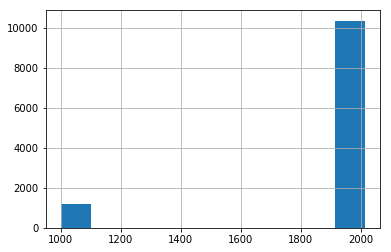

In [160]:
df_test.YearMade.hist()


In [161]:
df_test.state.nunique()

48

In [171]:
for i in list(df.state.unique()):
    if i not in list(df_test.state.unique()):
        print(i)
        

Alaska
Hawaii
Vermont
Washington DC
Unspecified


In [169]:
list(df.state.unique())

['Alabama',
 'North Carolina',
 'New York',
 'Texas',
 'Arizona',
 'Florida',
 'Illinois',
 'Oregon',
 'Ohio',
 'Arkansas',
 'Wisconsin',
 'Kansas',
 'Nevada',
 'Iowa',
 'Maine',
 'Massachusetts',
 'California',
 'Louisiana',
 'Minnesota',
 'New Hampshire',
 'Idaho',
 'Michigan',
 'Mississippi',
 'Georgia',
 'Missouri',
 'South Carolina',
 'Utah',
 'Tennessee',
 'Washington',
 'Virginia',
 'South Dakota',
 'West Virginia',
 'Oklahoma',
 'Pennsylvania',
 'Wyoming',
 'North Dakota',
 'New Jersey',
 'Kentucky',
 'Montana',
 'Alaska',
 'Nebraska',
 'Maryland',
 'Hawaii',
 'Colorado',
 'New Mexico',
 'Indiana',
 'Connecticut',
 'Delaware',
 'Rhode Island',
 'Vermont',
 'Washington DC',
 'Puerto Rico',
 'Unspecified']

In [170]:
list(df_test.state.unique())

['Kentucky',
 'Connecticut',
 'Florida',
 'Illinois',
 'West Virginia',
 'Utah',
 'Virginia',
 'Texas',
 'Washington',
 'Wisconsin',
 'North Carolina',
 'New Jersey',
 'Oklahoma',
 'Maryland',
 'South Carolina',
 'Puerto Rico',
 'Arkansas',
 'Pennsylvania',
 'California',
 'Arizona',
 'Michigan',
 'Georgia',
 'Massachusetts',
 'New York',
 'Louisiana',
 'Mississippi',
 'Ohio',
 'Alabama',
 'Colorado',
 'Minnesota',
 'New Mexico',
 'Nevada',
 'Tennessee',
 'Indiana',
 'Wyoming',
 'Oregon',
 'Idaho',
 'Kansas',
 'Missouri',
 'Nebraska',
 'Iowa',
 'Montana',
 'North Dakota',
 'South Dakota',
 'Delaware',
 'New Hampshire',
 'Rhode Island',
 'Maine']

In [178]:
if 'SalesID' in df.columns:
    print( 'yes')

yes


In [177]:
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

In [1]:
X_train

NameError: name 'X_train' is not defined